## Selección de características para mejorar modelos predictivos

En este cuadernillo se realiza el tratamiento de datos del csv TITANIC, así como la implementación y comparación de varios algoritmos de búsqueda y entrenamiento.

### Tratamiento de datos(Hay que CAMBIAR)

Se aplicaron los siguientes procesos de preprocesamiento de datos:

    •Normalización de variables predictoras: Se normalizaron las variables Age y Fare utilizando el escalador MinMaxScaler para asegurar que todas las características estén en la misma escala.

    •Codificación numérica de atributos discretos: Los atributos Sex, Embarked, Alone y Deck, que originalmente se presentaban como cadenas de texto, fueron codificados numéricamente utilizando las técnicas de OrdinalEncoder o LabelEncoder, según corresponda.

### Primer experimento para evaluar la capacidad predictiva del conjunto de variables completo

    Para evaluar la calidad de las soluciones que se obtienen con los algoritmos de búsqueda de variables, se realizó un primer experimento en el que se entrenó un modelo de clasificación utilizando todas las variables predictoras disponibles. Se utilizó un árbol de decisión de clasificación.

### Algoritmos de búsqueda implementados

    •Búsqueda secuencial hacia atrás (backward_sequential_search): Este algoritmo busca encontrar el mejor subconjunto de variables predictoras eliminando iterativamente la variable que más afecta el rendimiento del modelo.

    •Búsqueda secuencial hacia atrás mixta (backward_sequential_search_mixto): Similar al anterior, pero también considera añadir variables si se mejora el rendimiento del modelo.

### Algoritmos de entrenamiento

    •Árboles de decisión de clasificación (DecisionTreeClassifier): Un algoritmo de aprendizaje supervisado utilizado para clasificación.




## Tratamiento de datos

In [1]:
import numpy as np
np.random.seed(357823)

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler


model = RandomForestClassifier()

breast_cancer = pd.read_csv('../data/BreastCancer.csv')
breast_cancer.head()

atributos_discretos = ['diagnosis']
atributos_continuos = ['mean radius' ,'mean texture' ,'mean perimeter' ,'mean area' ,'mean smoothness' ,'mean compactness' ,'mean concavity' ,
                       'mean concave points' ,'mean symmetry' ,'mean fractal dimension' ,'radius error' ,'texture error' ,'perimeter error' ,
                       'area error' ,'smoothness error' ,'compactness error' ,'concavity error' ,'concave points error','symmetry error','fractal dimension error',
                       'worst radius' ,'worst texture' ,'worst perimeter','worst area' ,'worst smoothness','worst compactness' ,'worst concavity' ,'worst concave points','worst symmetry','worst fractal dimension']
atributos = breast_cancer.loc[:, atributos_discretos + atributos_continuos]

objetivo = breast_cancer['diagnosis']
objetivo.head()  # objetivo es una Series unidimensional

codificador_atributos_discretos = OrdinalEncoder()
codificador_atributos_discretos.fit(atributos[atributos_discretos])

print('Número de atributos detectados:',
      f'{codificador_atributos_discretos.n_features_in_}')
print()
print('Nombres de los atributos detectados:')
print(f'{codificador_atributos_discretos.feature_names_in_}')
print()
print('Categorías detectadas de cada atributo:')
for atributo, categorías in zip(
    codificador_atributos_discretos.feature_names_in_,
    codificador_atributos_discretos.categories_):
    print(f'{atributo}: {categorías}')

atributos[atributos_discretos] = codificador_atributos_discretos.transform(atributos[atributos_discretos])

atributos.head()

codificador_objetivo = LabelEncoder()
# El método fit_transform ajusta el codificador a los datos y, a continuación,
# codifica estos adecuadamente. En este caso no necesitamos mantener el
# atributo objetivo como una Series de Pandas.
objetivo = codificador_objetivo.fit_transform(objetivo)
print(f'Clases detectadas: {codificador_objetivo.classes_}')


normalizador = MinMaxScaler(
    # Cada atributo se normaliza al intervalo [0, 1]
    feature_range=(0, 1)
)


# Como nos interesa conservar los atributos originales, realizamos la
# normalización sobre una copia del DataFrame de atributos
atributos_normalizados = atributos.copy()
atributos_normalizados[:] = normalizador.fit_transform(atributos_normalizados)
atributos_normalizados.head()

Número de atributos detectados: 1

Nombres de los atributos detectados:
['diagnosis']

Categorías detectadas de cada atributo:
diagnosis: [0 1]
Clases detectadas: [0 1]


,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## Evaluación del modelo

### Árbol de decisión de clasificación(DecisionTreeClassifier)

Clases detectadas: [0 1]


array([[212,   0],
       [  0, 357]], dtype=int64)

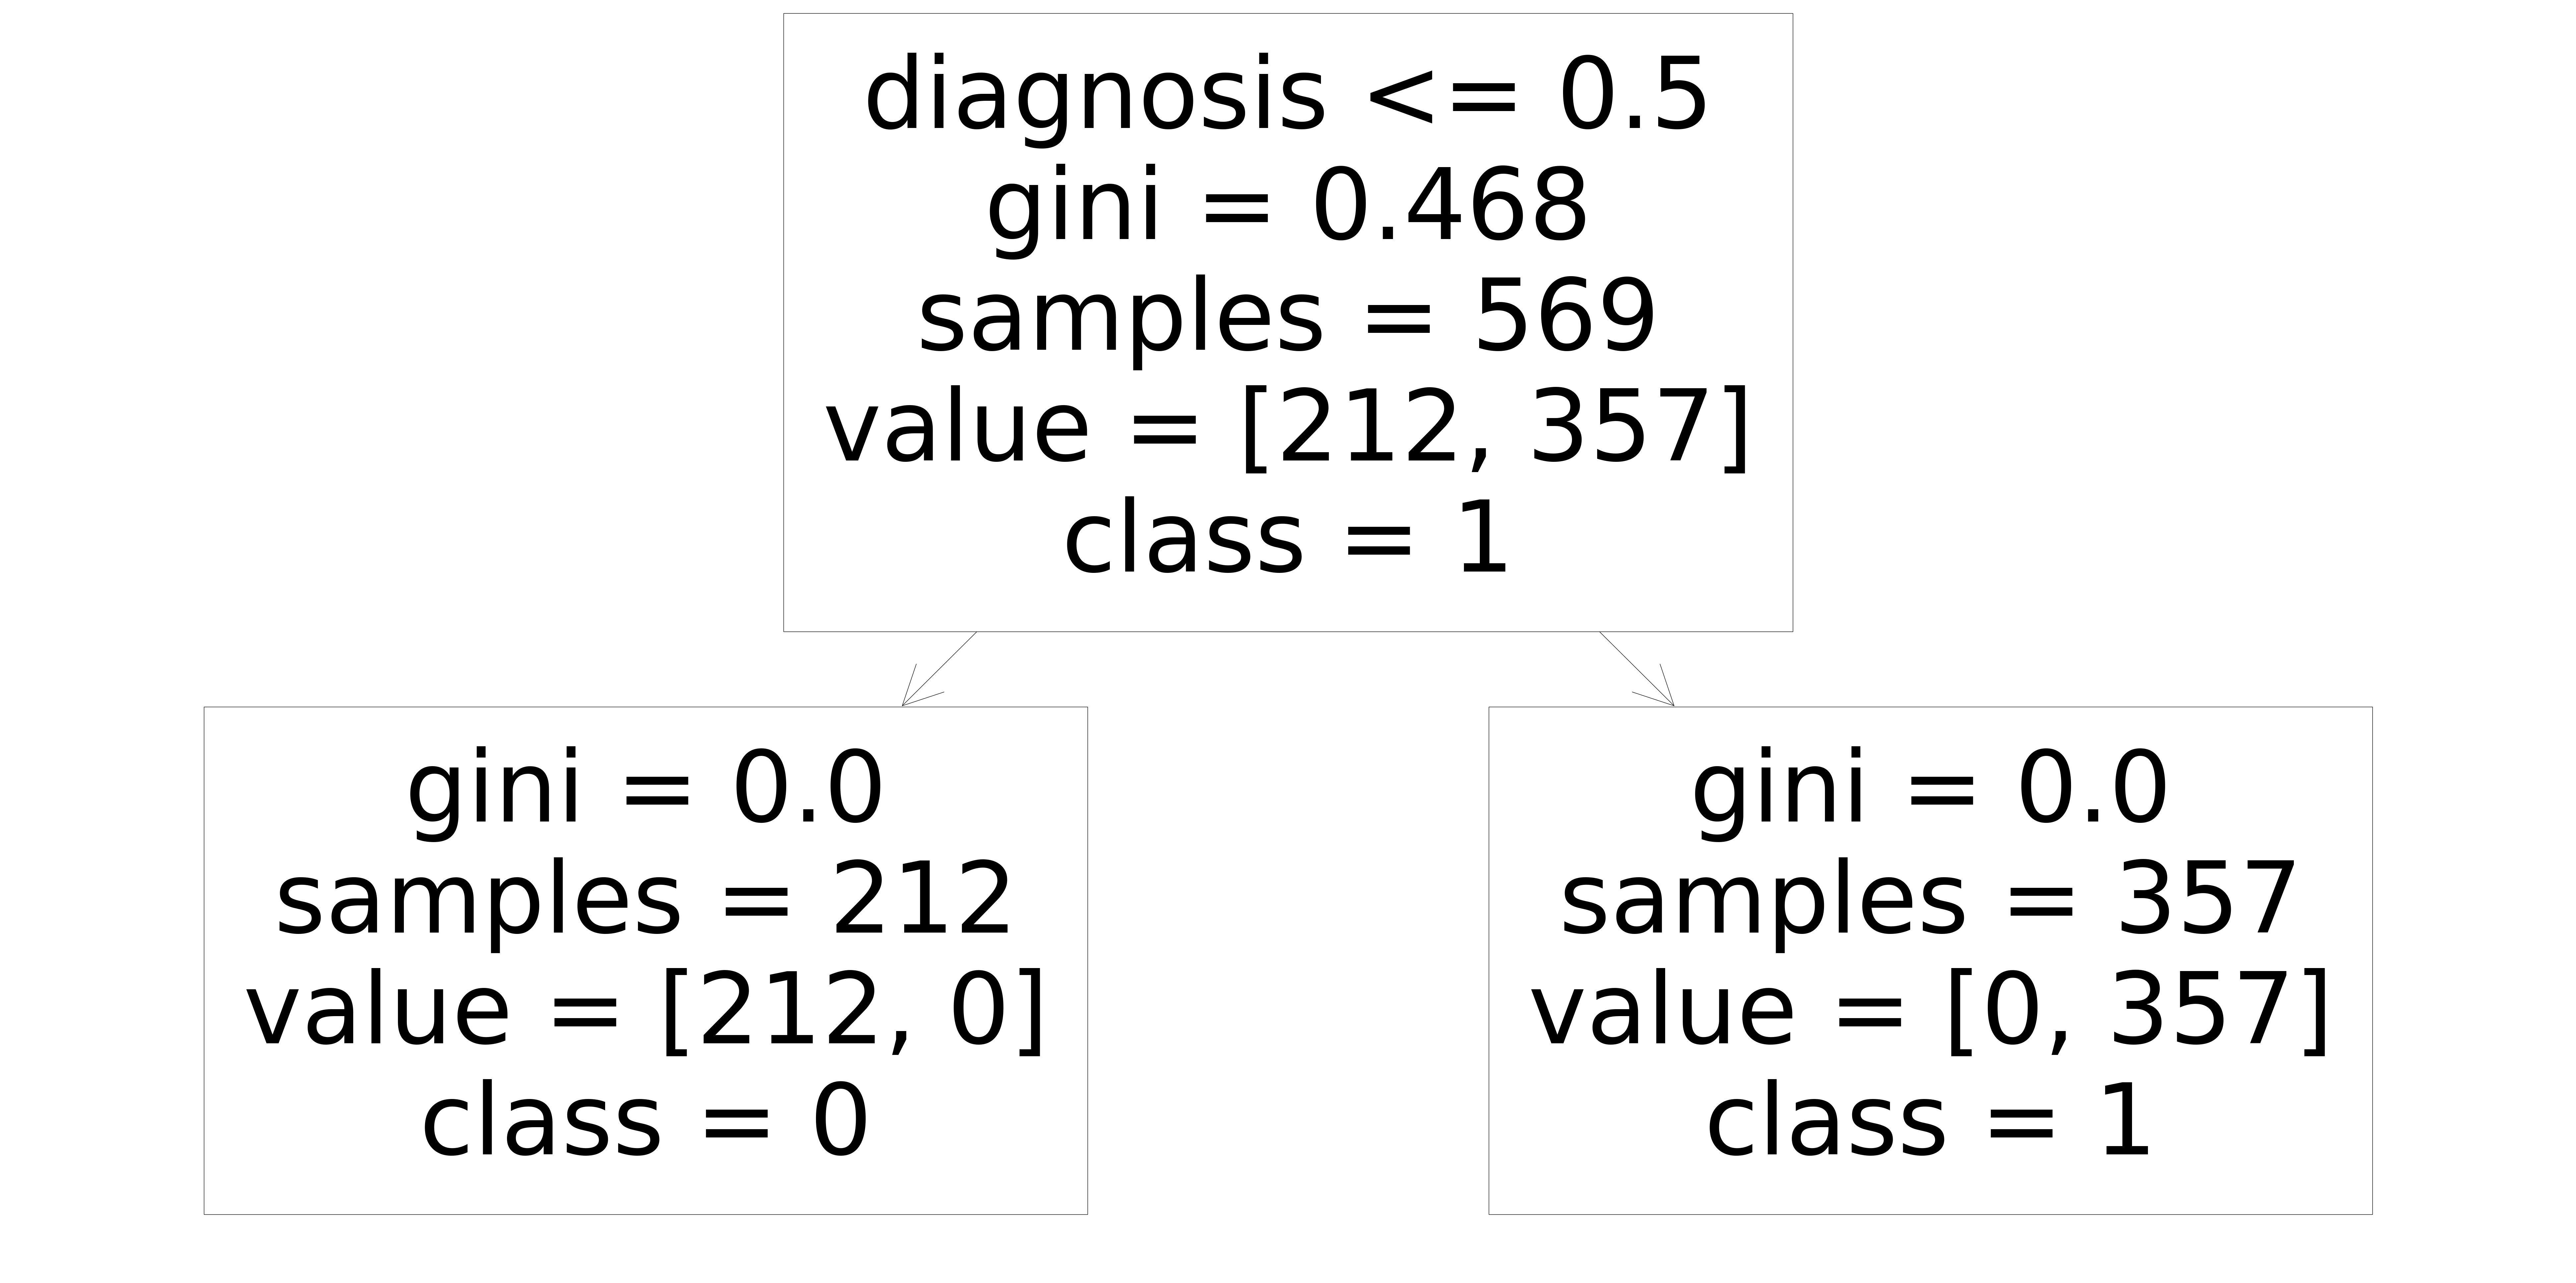

In [15]:
from matplotlib import pyplot
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


codificador_objetivo = LabelEncoder()
objetivo = codificador_objetivo.fit_transform(objetivo)
print(f'Clases detectadas: {codificador_objetivo.classes_}')

clasificador_CART = DecisionTreeClassifier(
    max_depth=8,  # Profundidad máxima del árbol
)
clasificador_CART.fit(atributos, objetivo)


pyplot.figure(figsize=(100, 50))  # Anchura y altura del gráfico
árbol = plot_tree(clasificador_CART,
                  # El argumento feature_names permite proporcionar, en una
                  # lista, los nombres de los atributos.
                  feature_names=atributos_discretos + atributos_continuos,
                  # El argumento class_names permite proporcionar, en una
                  # lista, los nombres de las clases
                  class_names=['0', '1'])

# Predicciones

predicciones = clasificador_CART.predict(atributos)
predicciones

clasificador_CART.score(atributos, objetivo)

pd.Series(objetivo).value_counts()

pd.Series(predicciones).value_counts()
conf_matrix = confusion_matrix(objetivo, predicciones)
conf_matrix

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos, objetivo,
        # Tamaño del conjunto de prueba (20 % en este caso)
        test_size=.2,
        # Estratificación según la distribución de clases en el atributo objetivo
        stratify=objetivo)

clasificador_CART = DecisionTreeClassifier(
    max_depth=4,  # Máxima profundidad del árbol
    min_samples_split=5  # Mínimo número de ejemplos para poder particionar
)

resultados_validación_cruzada = cross_validate(clasificador_CART,
                                               atributos_entrenamiento,
                                               objetivo_entrenamiento,
                                               scoring='recall',
                                               cv=10)
#resultados_validación_cruzada
resultados_validación_cruzada['test_score'].mean()

1.0

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Supongamos que atributos es un DataFrame con las características y objetivo es una Serie con la variable objetivo
# Ajustar el modelo
clasificador_CART = DecisionTreeClassifier(max_depth=8)
clasificador_CART.fit(atributos, objetivo)

# Calcular la precisión del modelo
score = clasificador_CART.score(atributos, objetivo)

# Obtener las predicciones
predicciones = clasificador_CART.predict(atributos)

# Contar los valores de la variable objetivo
values = pd.Series(objetivo).value_counts()

# Calcular la matriz de confusión
m_confusion = confusion_matrix(objetivo, predicciones)

# Imprimir los resultados
print(f'Variabes predictoras: \n{atributos.columns}')
print()
print(f'Precisión: {score}')
print()
print(f'Valores: {values}')
print()
print(f'Matriz de confusión: \n{m_confusion}')



Variabes predictoras: 
Index(['diagnosis', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

Precisión: 1.0

Valores: 1    357
0    212
Name: count, dtype: int64

Matriz de confusión: 
[[212   0]
 [  0 357]]


### Modelo Naive Bayes

In [17]:
from sklearn.naive_bayes import CategoricalNB
clasificador_NB = CategoricalNB(alpha=1)  # alpha es el parámetro de suavizado

solucion = breast_cancer.loc[:, atributos.columns]
clasificador_NB.fit(solucion, objetivo)

# Calcular la precisión del modelo
score = clasificador_NB.score(solucion, objetivo)

# Obtener las predicciones
predicciones = clasificador_NB.predict(solucion)

# Contar los valores de la variable objetivo
values = pd.Series(objetivo).value_counts()

# Calcular la matriz de confusión
m_confusion = confusion_matrix(objetivo, predicciones)

# Imprimir los resultados
print(f'Variabes predictoras: {atributos}')
print(f'Precisión: {score}')
print(f'Valores: {values}')
print(f'Matriz de confusión: \n{m_confusion}')

Variabes predictoras:      diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0          0.0        17.99         10.38          122.80     1001.0   
1          0.0        20.57         17.77          132.90     1326.0   
2          0.0        19.69         21.25          130.00     1203.0   
3          0.0        11.42         20.38           77.58      386.1   
4          0.0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564        0.0        21.56         22.39          142.00     1479.0   
565        0.0        20.13         28.25          131.20     1261.0   
566        0.0        16.60         28.08          108.30      858.1   
567        0.0        20.60         29.33          140.10     1265.0   
568        1.0         7.76         24.54           47.92      181.0   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
0            0.11840           0.2

## Algoritmo de búsqueda hacia atrás

In [6]:
#Esto parametros nos permite tener el minimo num de variables de predictoras y un mayor score
import funciones.BusquedaSecuencialAtras as bsa
bsatras = bsa.backward_sequential_search(breast_cancer, 'diagnosis', model, 1, 2)
bsatras


,variables,size,score
12,"[mean radius, mean texture, mean smoothness, r...",13,0.968004
23,"[mean radius, mean texture, mean area, mean sm...",24,0.966165
11,"[mean radius, mean texture, mean smoothness, r...",12,0.965195
7,"[mean radius, area error, compactness error, w...",8,0.964760
21,"[mean radius, mean texture, mean area, mean sm...",22,0.964241
14,"[mean radius, mean texture, mean smoothness, m...",15,0.963806
25,"[mean radius, mean texture, mean area, mean sm...",26,0.963363
27,"[mean radius, mean texture, mean area, mean sm...",28,0.962860
20,"[mean radius, mean texture, mean area, mean sm...",21,0.962844
17,"[mean radius, mean texture, mean area, mean sm...",18,0.962844


### Árbol de decisión de clasificación(DecisionTreeClassifier)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

for k in range(0, len(bsatras)-1, 1):
    selected_variables = bsatras.iloc[k]['variables']  # Obtiener las variables de la mejor iteración
    solucion = breast_cancer.loc[:, selected_variables]
    # Realizar la búsqueda secuencial hacia atrás
    model = DecisionTreeClassifier(max_depth=8)

    # Dividir los datos
    X = breast_cancer[selected_variables]
    objetivo= breast_cancer['diagnosis']
    X_train, X_test, y_train, y_test = train_test_split(X, objetivo, test_size=.2,stratify=objetivo)

    # Entrenar el modelo
    clasificador_CART = DecisionTreeClassifier(
        max_depth=10,  # Máxima profundidad del árbol
        min_samples_split=5  # Mínimo número de ejemplos para poder particionar
    )

    resultados_validación_cruzada = cross_validate(clasificador_CART,
                                                X_train,
                                                y_train,
                                                scoring='recall',
                                                cv=10)

    # Ajustar el modelo
    clasificador_CART = DecisionTreeClassifier(max_depth=8)
    clasificador_CART.fit(solucion, objetivo)

    # Calcular la precisión del modelo
    score = clasificador_CART.score(solucion, objetivo)

    # Obtener las predicciones
    predicciones = clasificador_CART.predict(solucion)

    # Contar los valores de la variable objetivo
    values = pd.Series(objetivo).value_counts()

    # Calcular la matriz de confusión
    m_confusion = confusion_matrix(objetivo, predicciones)

    # Imprimir los resultados
    print(f'Variabes predictoras: \n{selected_variables}')
    print(f'Precisión: {score}')
    print(f'Valores: {values}')
    print(f'Matriz de confusión: \n{m_confusion}')
    print()

Variabes predictoras: 
['mean radius', 'mean texture', 'mean smoothness', 'radius error', 'area error', 'compactness error', 'concave points error', 'fractal dimension error', 'worst texture', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points']
Precisión: 0.9982425307557118
Valores: diagnosis
1    357
0    212
Name: count, dtype: int64
Matriz de confusión: 
[[211   1]
 [  0 357]]

Variabes predictoras: 
['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Precisión: 1.0
Valores: diagnosis
1    357
0    212
Name: count, dtype: int64
Matriz de confusión: 
[[212   

### Modelo Naive Bayes

In [9]:
from sklearn.naive_bayes import CategoricalNB
clasificador_NB = CategoricalNB(alpha=1)  # alpha es el parámetro de suavizado

for k in range(0, len(bsatras)-1, 1):

    selected_variables = bsatras.iloc[k]['variables']  # Obtiener las variables de la mejor iteración
    solucion = breast_cancer.loc[:, selected_variables]
    clasificador_NB.fit(solucion, objetivo)

    # Calcular la precisión del modelo
    score = clasificador_NB.score(solucion, objetivo)

    # Obtener las predicciones
    predicciones = clasificador_NB.predict(solucion)

    # Contar los valores de la variable objetivo
    values = pd.Series(objetivo).value_counts()

    # Calcular la matriz de confusión
    m_confusion = confusion_matrix(objetivo, predicciones)

    # Imprimir los resultados
    print(f'Variabes predictoras: {selected_variables}')
    print(f'Precisión: {score}')
    print(f'Valores: {values}')
    print(f'Matriz de confusión: \n{m_confusion}')

Variabes predictoras: ['mean radius', 'mean texture', 'mean smoothness', 'radius error', 'area error', 'compactness error', 'concave points error', 'fractal dimension error', 'worst texture', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points']
Precisión: 0.9507908611599297
Valores: diagnosis
1    357
0    212
Name: count, dtype: int64
Matriz de confusión: 
[[190  22]
 [  6 351]]
Variabes predictoras: ['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Precisión: 0.9578207381370826
Valores: diagnosis
1    357
0    212
Name: count, dtype: int64
Matriz de confusió

## Algoritmo de búsqueda hacia atrás mixta

In [10]:
import funciones.BusquedaSecuencialAtrasMixta as bsam
busq_atras_mixta = bsam.backward_sequential_mixed_search(breast_cancer, 'diagnosis', model, 10, 6, 10)
busq_atras_mixta

,variables,size,score
12,"[mean radius, mean texture, mean perimeter, me...",18,0.960917
20,"[mean texture, mean area, mean concavity, radi...",13,0.960797
17,"[mean texture, mean area, mean concavity, radi...",15,0.960793
34,"[concavity error, mean perimeter, symmetry err...",18,0.960738
30,"[concavity error, mean perimeter, symmetry err...",14,0.960566
16,"[mean radius, mean texture, mean area, mean co...",15,0.960555
14,"[mean radius, mean texture, mean area, mean co...",16,0.960521
33,"[concavity error, mean perimeter, symmetry err...",17,0.960286
15,"[mean radius, mean texture, mean area, mean co...",16,0.960235
24,"[mean texture, texture error, area error, wors...",13,0.960143


### Árbol de decisión de clasificación(DecisionTreeClassifier)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

for k in range(0, len(busq_atras_mixta)-1, 1):
    selected_variables = busq_atras_mixta.iloc[k]['variables']  # Obtener las variables de la mejor iteración
    solucion = breast_cancer.loc[:, selected_variables]
    # Realizar la búsqueda secuencial hacia atrás
    model = DecisionTreeClassifier(max_depth=8)

    # Dividir los datos
    X = breast_cancer[selected_variables]
    objetivo= breast_cancer['diagnosis']
    X_train, X_test, y_train, y_test = train_test_split(X, objetivo, test_size=.2,stratify=objetivo)

    # Entrenar el modelo
    clasificador_CART = DecisionTreeClassifier(
        max_depth=10,  # Máxima profundidad del árbol
        min_samples_split=5  # Mínimo número de ejemplos para poder particionar
    )

    resultados_validación_cruzada = cross_validate(clasificador_CART,
                                                X_train,
                                                y_train,
                                                scoring='recall',
                                                cv=10)

    # Ajustar el modelo
    clasificador_CART = DecisionTreeClassifier(max_depth=8)
    clasificador_CART.fit(solucion, objetivo)

    # Calcular la precisión del modelo
    score = clasificador_CART.score(solucion, objetivo)

    # Obtener las predicciones
    predicciones = clasificador_CART.predict(solucion)

    # Contar los valores de la variable objetivo
    values = pd.Series(objetivo).value_counts()

    # Calcular la matriz de confusión
    m_confusion = confusion_matrix(objetivo, predicciones)

    # Imprimir los resultados
    print(f'Variabes predictoras: \n{selected_variables}')
    print(f'Precisión: {score}')
    print(f'Valores: {values}')
    print(f'Matriz de confusión: \n{m_confusion}')
    print()  

Variabes predictoras: 
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'texture error', 'perimeter error', 'area error', 'compactness error', 'symmetry error', 'worst radius', 'worst compactness', 'worst concave points', 'worst symmetry', 'concavity error']
Precisión: 1.0
Valores: diagnosis
1    357
0    212
Name: count, dtype: int64
Matriz de confusión: 
[[212   0]
 [  0 357]]

Variabes predictoras: 
['mean texture', 'mean area', 'mean concavity', 'radius error', 'texture error', 'perimeter error', 'area error', 'worst radius', 'worst concave points', 'concavity error', 'mean perimeter', 'symmetry error', 'worst compactness']
Precisión: 1.0
Valores: diagnosis
1    357
0    212
Name: count, dtype: int64
Matriz de confusión: 
[[212   0]
 [  0 357]]

Variabes predictoras: 
['mean texture', 'mean area', 'mean concavity', 'radius error', 'texture error', 'perimeter error', 'area error', 'compactness er

### Modelo Naive Bayes

In [12]:
from sklearn.naive_bayes import CategoricalNB
clasificador_NB = CategoricalNB(alpha=1)  # alpha es el parámetro de suavizado
clasificador_NB.fit(solucion, objetivo)


CategoricalNB(alpha=1)

In [13]:
# Calcular la precisión del modelo
score = clasificador_NB.score(solucion, objetivo)

# Obtener las predicciones
predicciones = clasificador_NB.predict(solucion)

# Contar los valores de la variable objetivo
values = pd.Series(objetivo).value_counts()

# Calcular la matriz de confusión
m_confusion = confusion_matrix(objetivo, predicciones)

# Imprimir los resultados
print(f'Variabes predictoras: {selected_variables}')
print(f'Precisión: {score}')
print(f'Valores: {values}')
print(f'Matriz de confusión: \n{m_confusion}')

Variabes predictoras: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Precisión: 0.9560632688927944
Valores: diagnosis
1    357
0    212
Name: count, dtype: int64
Matriz de confusión: 
[[190  22]
 [  3 354]]
